In [1]:
import numpy as np
np.random.seed(2022)
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
%matplotlib inline

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

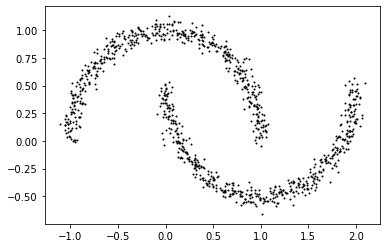

In [2]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=2022)

plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
plt.show()

In [3]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)


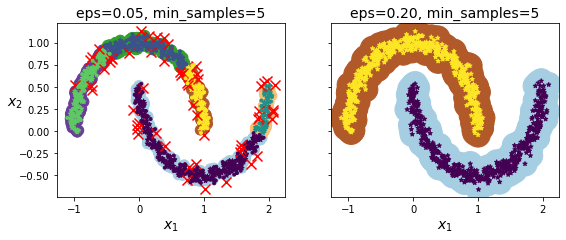

In [4]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

# print(np.unique(dbscan.labels_))
# print(len(dbscan.core_sample_indices_))
# print(dbscan.labels_[:20])
# print(dbscan.core_sample_indices_[:20])
# print(dbscan.components_[:3])


dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.figure(figsize=(9, 3.2))
plt.subplot(121)
plot_dbscan(dbscan, X, size=100)
plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)
plt.show()
